In [24]:
from syotools.models import Telescope, Camera, PhotometricExposure
from syotools.utils.jsonunit import str_jsunit
from syotools.spectra import SpectralLibrary
import astropy.units as u
import numpy as np 
import matplotlib.pyplot as plt
from strong_lens import StrongLens
import pandas as pd

In [25]:
# create the basic objects 
t, c = Telescope(), Camera()

t.set_from_json('EAC1')
t.aperture = 8 * u.m

t.add_camera(c)

e = c.create_exposure()
exposure_time = 10  # hours
e.sed_id = 'sbc'
e.exptime[1]['value'] = [exposure_time for _ in c.bandnames] 

Setting Telescope to:  EAC1


In [26]:
for attr in t._tracked_attributes:
    print('{}: {}'.format(attr, str_jsunit(getattr(t,attr))))

name: HWO-EAC-1
aperture: 8.0 m
temperature: 270.0 K
ota_emissivity: 0.24
diff_limit_wavelength: 500.0 nm
unobscured_fraction: 1.0


In [27]:
for attr in c._tracked_attributes:
    print('{}: {}'.format(attr, str_jsunit(getattr(c,attr))))

name: HDI
pivotwave: [ 225.  275.  336.  475.  606.  775.  850. 1260. 1600. 2220.] nm
bandnames: ['FUV', 'NUV', 'U', 'B', 'V', 'R', 'I', 'J', 'H', 'K']
channels: [[0, 1], [2, 3, 4, 5, 6], [7, 8, 9]]
fiducials: [ 400.  400. 1200.] nm
total_qe: [0.1   0.112 0.175 0.211 0.211 0.211 0.145 0.342 0.342 0.335] electron / ph
ap_corr: [1. 1. 1. 1. 1. 1. 1. 1. 1. 1.] 
bandpass_r: [5. 5. 5. 5. 5. 5. 5. 5. 5. 5.] 
dark_current: [0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002 0.002] electron / (pix s)
detector_rn: [2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5 2.5] electron(1/2) / pix(1/2)
sky_sigma: [24.56 26.27 23.38 22.8  22.41 22.2  22.11 22.32 22.53 22.88] 


In [28]:
for attr in e._tracked_attributes:
    print('{}: {}'.format(attr, str_jsunit(getattr(e, attr))))

sed: ['JsonSpectrum', {'wave': [1235.0, 1240.0, 1245.0, 1250.0, 1255.0, 1260.0, 1265.0, 1270.0, 1275.0, 1280.0, 1285.0, 1290.0, 1295.0, 1300.0, 1305.0, 1310.0, 1315.0, 1320.0, 1325.0, 1330.0, 1335.0, 1340.0, 1345.0, 1350.0, 1355.0, 1360.0, 1365.0, 1370.0, 1375.0, 1380.0, 1385.0, 1390.0, 1395.0, 1400.0, 1405.0, 1410.0, 1415.0, 1420.0, 1425.0, 1430.0, 1435.0, 1440.0, 1445.0, 1450.0, 1455.0, 1460.0, 1465.0, 1470.0, 1475.0, 1480.0, 1485.0, 1490.0, 1495.0, 1500.0, 1505.0, 1510.0, 1515.0, 1520.0, 1525.0, 1530.0, 1535.0, 1540.0, 1545.0, 1550.0, 1555.0, 1560.0, 1565.0, 1570.0, 1575.0, 1580.0, 1585.0, 1590.0, 1595.0, 1600.0, 1605.0, 1610.0, 1615.0, 1620.0, 1625.0, 1630.0, 1635.0, 1640.0, 1645.0, 1650.0, 1655.0, 1660.0, 1665.0, 1670.0, 1675.0, 1680.0, 1685.0, 1690.0, 1695.0, 1700.0, 1705.0, 1710.0, 1715.0, 1720.0, 1725.0, 1730.0, 1735.0, 1740.0, 1745.0, 1750.0, 1755.0, 1760.0, 1765.0, 1770.0, 1775.0, 1780.0, 1785.0, 1790.0, 1795.0, 1800.0, 1805.0, 1810.0, 1815.0, 1820.0, 1825.0, 1830.0, 1835.0, 

In [29]:
df = pd.read_csv('hwo_lens_population.csv')
strong_lenses = [StrongLens(row) for _, row in df.iterrows()]

In [30]:
# sample_lens = np.random.choice(strong_lenses)
sample_lens = strong_lenses[0]

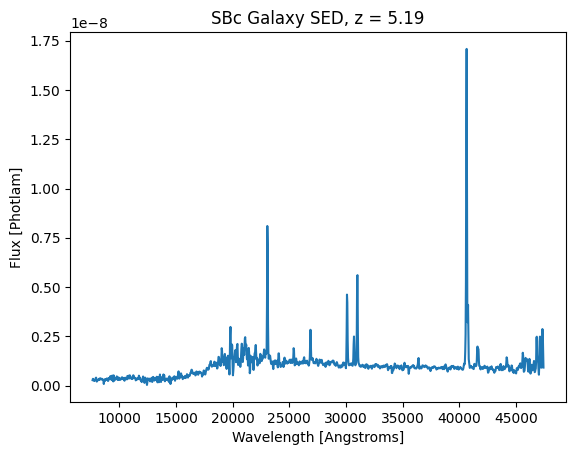

In [46]:
e.redshift = sample_lens.z_source
sed = e.recover('sed')

plt.plot(sed.wave, sed.flux)
plt.xlabel('Wavelength [Angstroms]')
plt.ylabel('Flux [Photlam]')
plt.title('SBc Galaxy SED, z = {:.2f}'.format(e.redshift))
plt.savefig('figures/hwo_sample_sed.png')
plt.show()

In [32]:
# for band, mag in sample_lens.lensed_source_magnitudes.items():
#     print(f'{band}: {mag}')
# e.magnitude[1]['value'] = [sample_lens.get_lensed_source_mag(band) for band in c.bandnames] 

band = 'v'
lensed_source_mag = sample_lens.get_lensed_source_mag(band)

e.renorm_sed(lensed_source_mag * u.ABmag, bandpass=band, force=False)

In [33]:
sed, snrs = e.recover('sed', 'snr')

print(snrs)

[ 2.77522801  3.89174406  6.17107852  9.03740915  9.38532889  9.29591395
  8.06196522 18.98326876 29.35139197  4.34220587] electron(1/2)


In [37]:
print(snrs.value)

[ 2.77522801  3.89174406  6.17107852  9.03740915  9.38532889  9.29591395
  8.06196522 18.98326876 29.35139197  4.34220587]


In [40]:
idx = c.bandnames.index('J')
print(idx)

7


In [34]:
# # hri_sed.convert('abmag')
# sed.convert('nm')

# plt.plot(sed.wave, sed.flux)
# plt.xlabel('Wavelength [nm]')
# # plt.ylabel('AB Magnitude')
# plt.show()

In [35]:
for attr in e._tracked_attributes:
    print('{}: {}'.format(attr, str_jsunit(getattr(e, attr))))

sed: ['JsonSpectrum', {'wave': [7648.159205593822, 7679.1234129039185, 7710.087620214015, 7741.051827524111, 7772.016034834208, 7802.980242144305, 7833.9444494544005, 7864.908656764497, 7895.872864074594, 7926.83707138469, 7957.801278694787, 7988.765486004883, 8019.729693314979, 8050.693900625076, 8081.658107935173, 8112.6223152452685, 8143.586522555365, 8174.550729865462, 8205.514937175558, 8236.479144485655, 8267.443351795751, 8298.407559105848, 8329.371766415943, 8360.33597372604, 8391.300181036137, 8422.264388346233, 8453.22859565633, 8484.192802966427, 8515.157010276522, 8546.121217586619, 8577.085424896715, 8608.049632206812, 8639.013839516909, 8669.978046827006, 8700.9422541371, 8731.906461447197, 8762.870668757294, 8793.83487606739, 8824.799083377487, 8855.763290687584, 8886.72749799768, 8917.691705307776, 8948.655912617873, 8979.62011992797, 9010.584327238066, 9041.548534548163, 9072.512741858258, 9103.476949168355, 9134.441156478451, 9165.405363788548, 9196.369571098645, 9227

In [36]:
for band, snr in zip(c.bandnames, snrs): 
    print(f'{band}: {snr}') 

FUV: 2.7752280120513344 electron(1/2)
NUV: 3.891744058674761 electron(1/2)
U: 6.1710785228946055 electron(1/2)
B: 9.037409152944623 electron(1/2)
V: 9.385328891086967 electron(1/2)
R: 9.295913946070034 electron(1/2)
I: 8.061965219196523 electron(1/2)
J: 18.983268763667546 electron(1/2)
H: 29.351391973308946 electron(1/2)
K: 4.342205872945682 electron(1/2)
